In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install -U imbalanced-learn
!pip install pyspellchecker

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Oculta warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# CARGAR DATOS
**DATOS DE ENTRENAMIENTO**

la columna de trastornos indica si el TWEET es de una persona con depresión o es de control.


**control**:     0

**depresión**:   1

In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,RT @Julii_AKD: por qué a la mayoría de las pib...,1
1,6,2.147484e+09,Empezar un 2017 sintiéndote solo.,1
2,279,2.147484e+09,Ah mirá que lindo como me escrachan en Instagr...,0
3,518,2.147484e+09,https://t.co/hC3rULMb1P,0
4,301,2.147484e+09,"Tu sigue con él, cumple tu deber, muy pronto v...",0
5,177,2.147484e+09,@Sebbasrp deje dormir al prójimo.,0
6,45,2.147484e+09,"RT @Crookedgirlx: no quiero vivir más, estoy c...",1
7,29,2.147484e+09,RT @Esunbreakable: Me da un poquito de vergüen...,1
8,388,2.147484e+09,Venezuela-related Designation https://t.co/IOZ...,0
9,31,2.147484e+09,Tengo muchas ganas de escribirte para decirte ...,1


#DATOS DE PRUEBA

In [ ]:
num_docs = 500

In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data_train = data.iloc[:num_docs, :]
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,RT @Julii_AKD: por qué a la mayoría de las pib...,1
1,6,2.147484e+09,Empezar un 2017 sintiéndote solo.,1
2,279,2.147484e+09,Ah mirá que lindo como me escrachan en Instagr...,0
3,518,2.147484e+09,https://t.co/hC3rULMb1P,0
4,301,2.147484e+09,"Tu sigue con él, cumple tu deber, muy pronto v...",0
5,177,2.147484e+09,@Sebbasrp deje dormir al prójimo.,0
6,45,2.147484e+09,"RT @Crookedgirlx: no quiero vivir más, estoy c...",1
7,29,2.147484e+09,RT @Esunbreakable: Me da un poquito de vergüen...,1
8,388,2.147484e+09,Venezuela-related Designation https://t.co/IOZ...,0
9,31,2.147484e+09,Tengo muchas ganas de escribirte para decirte ...,1


# DATOS DE PRUEBA (TEST)

In [ ]:
num_docs_test = 5000

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/test.csv'
# data_test = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_t = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_test =data_t.iloc[:num_docs_test, :]
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   USER_ID     5000 non-null   int64 
 1   TWEET_ID    5000 non-null   int64 
 2   TWEET_TEXT  5000 non-null   object
 3   trastorno   5000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 156.4+ KB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,30,2147483647,RT @Unicornio_Azul5: ¿Está mal desear estar mu...,1
1,508,2147483647,RT @tachame_ladoble: Esta noche!! Volvemos a V...,0
2,279,2147483647,RT @PsychdelicPics: Art by I Love Doodle https...,0
3,12,2147483647,Hoy no he pasado de las 700kcal.,1
4,277,2147483647,RT @NetSportAcademy: Elisa Luque se proclama c...,0


#Preprocesamiento de los datos

In [ ]:
import nltk
nltk.download('stopwords')  #Solamente se ha de descargar la primera vez.
stopwords_es = nltk.corpus.stopwords.words('spanish')   # Extrae las stopwords en español

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


*Eliminar etiquetas HTML*

In [ ]:
import re

def removeHTML(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', text)
        return cleantext
    else:
        return text  # Devolver el valor original si no es de tipo string

*Limpieza del texto*

In [ ]:
import re
import string

def clean(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        # Eliminar hashtags
        text = re.sub(r'#\w+', '', text)

        # Eliminar URLs o enlaces
        text = re.sub(r'(https?://)?[a-zA-Z0-9]+\.[a-zA-Z0-9]+\S*', '', text)

        # Eliminar nombres de usuarios de Twitter
        text = re.sub(r'@\w+', '', text)

        # Eliminar Nombres propios
        text = re.sub(r'\b[A-Z][a-z]+\b', '', text)

        # Eliminar todos los caracteres especiales
        text = re.sub(r'[^\w\s]+', '', text)

        # Eliminar prefijos y números
        text = re.sub(r'\b\w{1,2}\b|\d+', '', text)

        # Eliminar palabras específicas
        specific_words = ['retweet', 'retweets', 'hashtag', 'trending', 'mención', 'enlace', 'emoji', 'timeline', 'interacciones',
                          'tuit', 'seguidores', 'notificaciones', 'seguir', 'favorito', 'perfil', 'tendencia', 'influencer',
                          'compartir', 'actualización', 'explorar', 'seguir', 'comunidad', 'contenido', 'popular',
                          'recomendar', 'experiencia', 'conectar', 'comentar', 'compartir', 'comunidad', 'actualización',
                          'drk', 'followers', 'stats', 'for', 'new', 'little', 'unfollower', 'unfollowers', 'today', 'shit','twitter','nombre',
                          'eric','story','great', 'short','squeeze','piggly','wiggly','hmv','even','follas','you','i','he','she',
                          'it','we','they','the','and','that','these','those','tweet','followed','follower']
        text = ' '.join([word for word in text.split() if word not in specific_words])

        # Eliminar emojis
        emojis = re.findall(r'[^\w\s,]', text)
        cleaned_emojis = [emoji for emoji in emojis if emoji not in ['@', '#', '/', '?','¿','.','…','"',':','“','!','¡','°','-',"‘",'’',
                                                                     '=',';','(',')',"'","'",'&','€','%','$','*','+','|', '”','🇦','🇷',',',
                                                                     ', ','—','«',' »','»','« ','[, ]','[,]',',',', ','',' ',' ♀',' 🏽']]
        for emoji in cleaned_emojis:
            text = text.replace(emoji, '')

        # Convertir el texto a minúsculas
        text = text.lower()

        # Eliminar signos de puntuación
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
        # Tokenizar el texto en palabras
        words = text.split()

        # Eliminar palabras vacías
        words = [word for word in words if word not in stopwords_es]

        # Reconstruir el texto limpio
        text = ' '.join(words)

        # Devuelve el texto limpio
        return text
    else:
        return text  # Devolver el valor original si no es de tipo string

*lematizar y extraer términos*

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es import Spanish
from nltk.corpus import stopwords


# Cargar modelo de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar stopwords en español
stopwords_es = set(stopwords.words('spanish'))
def extractTerms(text):
    if isinstance(text, str):
        # Tokenización y lematización con spaCy
        doc = nlp(text)
        lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

        return lemmatized_terms
    else:
        return []  # Devolver una lista vacía si el texto no es una cadena de texto

# Ejemplo de uso
texto_ejemplo = "Los gatos están saltando sobre las vallas"
terminos_extraidos = extractTerms(texto_ejemplo)
print(terminos_extraidos)

['gato', 'saltar', 'valla']


# Preprocesamieto del conjunto de datos de entrenamiento

In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(removeHTML)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(clean)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(extractTerms)
data_train.head(10)

,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,"[mayoría, piba, gustar, tener, pierna, grande,...",1
1,6,2.147484e+09,"[sintiéndote, solo]",1
2,279,2.147484e+09,"[mier, lindo, escrachan, magnifico]",0
3,518,2.147484e+09,[],0
4,301,2.147484e+09,"[seguir, cumple, deber, pronto, vestido, novia...",0
5,177,2.147484e+09,"[dejar, dormir, prójimo]",0
6,45,2.147484e+09,"[querer, vivir, cansado]",1
7,29,2.147484e+09,"[poquito, vergüenza, alguien, querer, alzar yo...",1
8,388,2.147484e+09,[related],0
9,31,2.147484e+09,"[mucho, gana, escribirtar, decirte, extraño, d...",1


In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 17995


In [ ]:
# Filtrar filas donde 'TWEET_TEXT' no sea una lista vacía
data_train = data_train[data_train['TWEET_TEXT'].apply(len) > 0]

# Reiniciar el índice del DataFrame después de eliminar filas
data_train.reset_index(drop=True, inplace=True)

In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 0


In [ ]:
from spellchecker import SpellChecker

def corrector_ortografico(tokens):
    spell = SpellChecker(language='es')
    tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
    return tokens_corregidos

def corregir_palabras_largas(tokens):
    tokens_corregidos = []
    for token in tokens:
        # Corregir repeticiones de letras
        token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

        # Corregir alargamiento de palabras
        token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

        # Eliminar vocales repetidas más de 2 veces seguidas
        token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

        tokens_corregidos.append(token_corregido)
    return tokens_corregidos


In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corregir_palabras_largas)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corrector_ortografico)
data_train.info()
data_train.head(10)

#Representación de los datos

La caracterización de texto mediente Embedding transforma cada palabra del contexto en un vector de embedding.



In [ ]:
import gensim
from gensim.models import Word2Vec
# Entrena un modelo Word2Vec usando CBOW
modelW = Word2Vec(data_train['TWEET_TEXT'], vector_size=300, window=5, min_count=1, sg=0)# - vector_size: el tamaño de los vectores de palabra
# - window: el tamaño de la ventana de contexto
# - min_count: el número mínimo de veces que una palabra debe aparecer para ser considerada
# - sg: 0 para CBOW, 1 para Skip-gram

# Obtener la representación vectorial de un documento promediando las palabras
def document_vector(tokens, modelW):
    # Filtrar palabras que no están en el modelo
    tokens = [token for token in tokens if token in modelW.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(modelW.vector_size)
    return np.mean([modelW.wv[token] for token in tokens], axis=0)

# Crear una matriz de características X utilizando las representaciones vectoriales de Word2Vec
X = [document_vector(tokens, modelW) for tokens in data_train['TWEET_TEXT']]

# Obtener las etiquetas y
y = data_train['trastorno'].values

# Ahora puedes usar X e y para entrenar tu modelo de clasificación como se mencionó anteriormente

In [ ]:
# Imprimimos el la longitud de las palabras totales
print(modelW)
print(len(modelW.wv))
# Observamos el vocabulario creado
words = modelW.wv.index_to_key
print(words)

Word2Vec<vocab=81688, vector_size=100, alpha=0.025>
81688
['hacer', 'querer', 'poder', 'día', 'ser', 'decir', 'vez', 'ir', 'persona', 'tanto', 'bien', 'vida', 'ver', 'solo', 'pasar', 'alguien', 'cosa', 'mejor', 'saber', 'sentir', 'siempre', 'mal', 'así', 'año', 'dejar', 'nadie', 'dar', 'mas', 'gana', 'nunca', 'mismo', 'gente', 'pensar', 'hablar', 'foto', 'todo', 'llorar', 'hoy', 'salir', 'tener', 'tiempo', 'vivir', 'creer', 'mundo', 'momento', 'volver', 'mañana', 'ahora', 'necesitar', 'llegar', 'dormir', 'mierdo', 'amor', 'amigo', 'vo', 'nuevo', 'feliz', 'gustar', 'quedar', 'esperar', 'menos', 'cada', 'poner', 'vía', 'deber', 'buen', 'verdad', 'seguir', 'comer', 'noche', 'morir', 'cómo', 'dos', 'lindo', 'casa', 'peor', 'único', 'mostrar', 'amar', 'sólo', 'hora', 'venir', 'entender', 'después', 'contar', 'triste', 'recuperar', 'primero', 'preocup', 'antiguo', 'problema', 'laptop', 'importar', 'alguno', 'miedo', 'doler', 'corazón', 'final', 'igual', 'bueno', 'mucho', 'semana', 'asco', 'c

In [ ]:
# Obtener la representación vectorial de una palabra específica
vector = modelW.wv['depresión']
vector

array([-0.757954  ,  0.45204026,  0.06721898,  0.4468536 ,  0.32039365,
       -0.5715685 , -0.14032412,  0.99840534, -0.77751833,  0.19518355,
       -0.17098652, -0.5229607 ,  0.3393444 ,  0.670903  ,  0.33226073,
       -1.1341778 ,  1.5154934 , -1.1948111 , -0.24898967, -1.4801852 ,
        1.079218  ,  0.5614213 , -0.02628592, -1.6106755 ,  0.3910848 ,
       -0.26012784, -1.0636528 , -0.67311233, -1.6267773 , -1.0026938 ,
        0.6656351 ,  0.43395066, -0.118244  , -1.0220712 ,  0.3404876 ,
        1.5123111 , -0.87018263, -0.22596519, -1.4198852 , -0.56338733,
       -0.78556603, -0.17292719, -0.41425917,  0.21879858, -0.19536325,
       -0.7293532 , -0.51317286, -0.7430189 ,  0.39923298,  1.3462886 ,
        1.3828415 ,  0.7272359 , -1.2832279 ,  0.19451837, -0.55822027,
       -0.7461571 , -0.26793456,  0.10697709, -0.64010006,  1.1539632 ,
        0.11392349,  0.36736333, -0.7033996 ,  0.04602199, -1.0152628 ,
        0.61277276,  0.3388784 ,  0.5188819 , -0.817934  ,  1.49

# Aprensizaje del modelo: Red Neuronal
**Validación Cruzada K=10**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam

#  X es una lista de representaciones vectoriales Word2Vec y y son las etiquetas (0 o 1)
X = X  # Aquí, X ya contiene las representaciones vectoriales de Word2Vec
y = np.array(y)

# Realizar balanceo si es necesario (oversampling)
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

# Ahora, X y y tienen el mismo número de muestras

# Convertir la lista de listas X_train en una matriz NumPy
X = np.array(X)

# Definir la estrategia de validación cruzada (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar métricas de entrenamiento y validación
train_accuracy_scores = []
train_precision_scores = []
train_recall_scores = []
train_f1_scores = []

val_accuracy_scores = []
val_precision_scores = []
val_recall_scores = []
val_f1_scores = []

# Realizar la validación cruzada
for train_index, val_index in cv.split(X, y):
    train_index, val_index = train_index.tolist(), val_index.tolist()  # Convertir a listas
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Crear una red neuronal secuencial para cada fold (reiniciar el modelo)
    model = Sequential()

    # Agregar una capa de entrada con el tamaño de los vectores Word2Vec
    input_dim = len(X_train[0])  # Obtener la longitud de un vector Word2Vec
    model.add(Dense(350, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))  # Dropout para regularización

    # Agregar una capa oculta
    model.add(Dense(228, activation='relu'))
    model.add(Dropout(0.3))  # Dropout para regularización

    # Agregar una capa de salida con una neurona y función de activación sigmoide para clasificación binaria
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    # Utilizar EarlyStopping para detener el entrenamiento si no hay mejora
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entrenar el modelo en los datos de entrenamiento del pliegue actual
    model.fit(X_train, y_train, epochs=1000, batch_size=200, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluar el modelo en el conjunto de entrenamiento del pliegue actual
    y_train_pred = (model.predict(X_train) > 0.5).astype(int)

    # Calcular métricas de entrenamiento y agregarlas a las listas
    train_accuracy_scores.append(accuracy_score(y_train, y_train_pred))
    train_precision_scores.append(precision_score(y_train, y_train_pred))
    train_recall_scores.append(recall_score(y_train, y_train_pred))
    train_f1_scores.append(f1_score(y_train, y_train_pred))

    # Evaluar el modelo en el conjunto de validación
    y_val_pred = (model.predict(X_val) > 0.5).astype(int)

    # Calcular métricas de validación y agregarlas a las listas
    val_accuracy_scores.append(accuracy_score(y_val, y_val_pred))
    val_precision_scores.append(precision_score(y_val, y_val_pred))
    val_recall_scores.append(recall_score(y_val, y_val_pred))
    val_f1_scores.append(f1_score(y_val, y_val_pred))

# Calcular las métricas promediadas en entrenamiento
train_accuracy_mean = np.mean(train_accuracy_scores)
train_precision_mean = np.mean(train_precision_scores)
train_recall_mean = np.mean(train_recall_scores)
train_f1_mean = np.mean(train_f1_scores)

# Calcular las métricas promediadas en validación
val_accuracy_mean = np.mean(val_accuracy_scores)
val_precision_mean = np.mean(val_precision_scores)
val_recall_mean = np.mean(val_recall_scores)
val_f1_mean = np.mean(val_f1_scores)

# Imprimir las métricas promediadas en entrenamiento y validación
print("Entrenamiento - Accuracy: {:.2f}%".format(100 * train_accuracy_mean))
print("Entrenamiento - Precision: {:.2f}%".format(100 * train_precision_mean))
print("Entrenamiento - Recall: {:.2f}%".format(100 * train_recall_mean))
print("Entrenamiento - F1 Score: {:.2f}%".format(100 * train_f1_mean))

print("Validación - Accuracy: {:.2f}%".format(100 * val_accuracy_mean))
print("Validación - Precision: {:.2f}%".format(100 * val_precision_mean))
print("Validación - Recall: {:.2f}%".format(100 * val_recall_mean))
print("Validación - F1 Score: {:.2f}%".format(100 * val_f1_mean))



Epoch 1/1000
1125/1125 [==============================] - 8s 6ms/step - loss: 0.5389 - accuracy: 0.7242 - val_loss: 0.5209 - val_accuracy: 0.7309
Epoch 2/1000
1125/1125 [==============================] - 7s 6ms/step - loss: 0.5253 - accuracy: 0.7309 - val_loss: 0.5184 - val_accuracy: 0.7344
Epoch 3/1000
1125/1125 [==============================] - 7s 6ms/step - loss: 0.5217 - accuracy: 0.7338 - val_loss: 0.5123 - val_accuracy: 0.7372
Epoch 4/1000
1125/1125 [==============================] - 7s 7ms/step - loss: 0.5193 - accuracy: 0.7348 - val_loss: 0.5110 - val_accuracy: 0.7378
Epoch 5/1000
1125/1125 [==============================] - 7s 6ms/step - loss: 0.5175 - accuracy: 0.7353 - val_loss: 0.5125 - val_accuracy: 0.7373
Epoch 6/1000
1125/1125 [==============================] - 7s 6ms/step - loss: 0.5160 - accuracy: 0.7365 - val_loss: 0.5084 - val_accuracy: 0.7415
Epoch 7/1000
1125/1125 [==============================] - 7s 6ms/step - loss: 0.5146 - accuracy: 0.7372 - val_loss: 0.5103 -

# Guardar el modelo


In [ ]:
import joblib
import os
# Directorio para guardar modelos entrenados
model_dir = '/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados'
model_filename = 'TWEETS_depresivos (RN-Word2Vec).pkl'
model_path_p = os.path.join(model_dir, model_filename)

# Guardar el modelo entrenado
joblib.dump(model, model_path_p)

['/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados/TWEETS_depresivos (RN-Word2Vec).pkl']

# Evaluación

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Función para calcular el vector promedio de un documento
def document_vector(tokens, modeWl):
    # Filtrar palabras que no están en el modelo Word2Vec
    tokens = [token for token in tokens if token in modelW.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(modelW.vector_size)
    return np.mean([modelW.wv[token] for token in tokens], axis=0)

# Aplicar transformaciones al conjunto de pruebas
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(removeHTML)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(clean)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(extractTerms)

# Obtener representaciones Word2Vec para el conjunto de pruebas
X_test_word2vec = [document_vector(tokens, modelW) for tokens in data_test['TWEET_TEXT']]

# Crear el conjunto de pruebas
X_test = np.array(X_test_word2vec)
y_test = data_test['trastorno'].values

# Predicciones en el conjunto de pruebas
y_test_pred = (model.predict(X_test) > 0.5).astype(int)  # Aquí asumimos un umbral de 0.5 para la clasificación

# Calcular precisión en el conjunto de pruebas
precision_test = precision_score(y_test, y_test_pred)

# Calcular exhaustividad (recall) en el conjunto de pruebas
recall_test = recall_score(y_test, y_test_pred)

# Calcular puntuación F1 en el conjunto de pruebas
f1_test = f1_score(y_test, y_test_pred)

# Calcular exactitud en el conjunto de pruebas (opcional)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Imprimir métricas de evaluación con el símbolo '%'
print("Precisión: {:.2f}%".format(precision_test * 100))
print("Exhaustividad (Recall): {:.2f}%".format(recall_test * 100))
print("Puntuación F1: {:.2f}%".format(f1_test * 100))
print("Exactitud: {:.2f}%".format(accuracy_test * 100))





157/157 [==============================] - 0s 2ms/step
Precisión: 72.55%
Exhaustividad (Recall): 71.30%
Puntuación F1: 71.92%
Exactitud: 72.18%


# MATRIZ DE CONFUSIÓN

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_test, y_pred_binario)
prop_real = np.sum(y_test)/len(y_test)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_test)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

157/157 [==============================] - 0s 2ms/step
Matriz de confusión: 

 [[1828  674]
 [ 717 1781]] 

Proporción de comentarios positivos: 0.50
Proporción de comentarios positivos etiquetados: 0.49


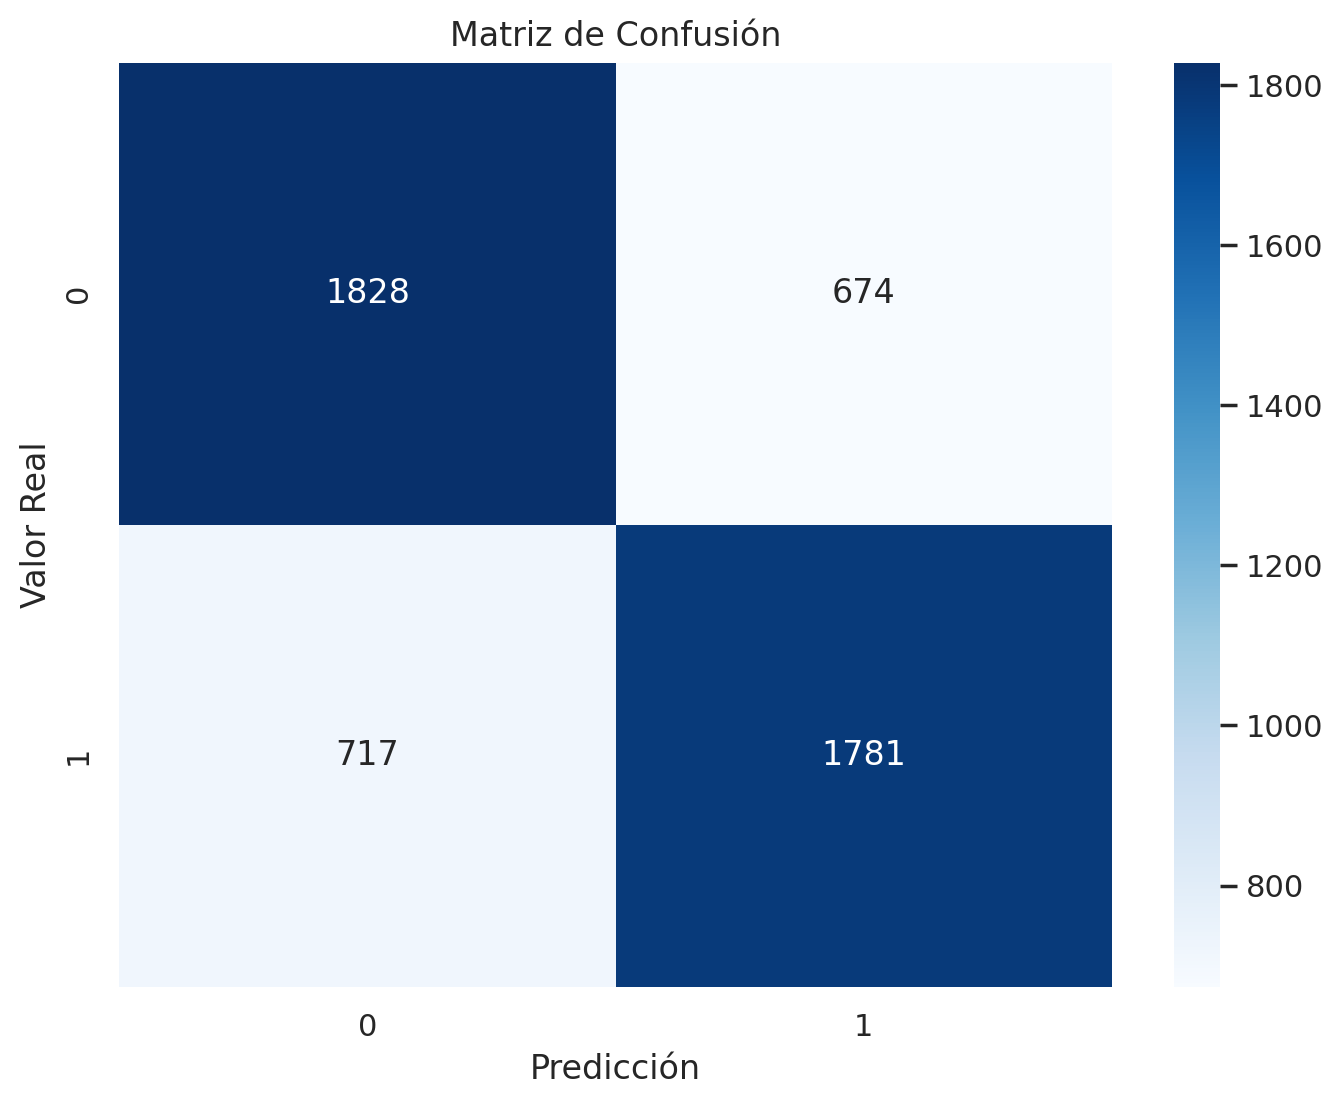

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

# Modelo Entrenado

In [ ]:
import joblib
import numpy as np

# Cargar el modelo entrenado
model_path = '/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados/TWEETS_depresivos (RN-Word2Vec).pkl'
loaded_model = joblib.load(model_path)

# Texto de ejemplo para predecir
new_tweet = "Que feo cuando te dicen un comentario y vos sabes que te duele cuando sentis ese nudo en la garganta y esas ganas de llorar"

# Preprocesamiento del texto
new_tweet_cleaned = clean(removeHTML(new_tweet))
new_tweet_extracted = extractTerms(new_tweet_cleaned)
new_tweet_combined = ' '.join(new_tweet_extracted)

# modelW = Word2Vec(data_train['TWEET_TEXT'], vector_size=100, window=5, min_count=1, sg=0)
def document_vector(tokens, modelW):
    # Filtrar palabras que no están en el modelo
    tokens = [token for token in tokens if token in modelW.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(modelW.vector_size)
    return np.mean([modelW.wv[token] for token in tokens], axis=0)

# Supongamos que 'word2vec_model' es tu modelo Word2Vec entrenado previamente
new_tweet_word2vec = document_vector(new_tweet_extracted, modelW)

# Redimensionar new_tweet_word2vec a una matriz 2D
new_tweet_word2vec = np.array([new_tweet_word2vec])

# Hacer la predicción y obtener las probabilidades de predicción
proba_prediction = loaded_model.predict(new_tweet_word2vec)

# Verificar la forma de proba_prediction
if proba_prediction.shape[1] == 1:
    # Solo una probabilidad en proba_prediction, se asume que es la probabilidad de clase 1
    control_prob = 1 - proba_prediction[0][0]  # Probabilidad de ser control
    depresion_prob = proba_prediction[0][0]  # Probabilidad de ser depresión
else:
    # Hay dos probabilidades en proba_prediction (clases binarias)
    control_prob = 1 - proba_prediction[0][0]  # Probabilidad de ser control
    depresion_prob = proba_prediction[0][0]  # Probabilidad de ser depresión

# Las probabilidades de clase están en 'control_prob' y 'depresion_prob'

# Imprimir el resultado basado en las probabilidades
print(new_tweet)
print('------------------------------------------------------------------')
if depresion_prob > control_prob:
    print("Este tweet es de depresión")
    print("Probabilidad de que el tweet sea de depresión: {:.2f}%".format(depresion_prob * 100))
else:
    print("Este tweet No es de depresión")
    print("Probabilidad de que el tweet no sea de depresión: {:.2f}%".format(control_prob * 100))


1/1 [==============================] - 0s 63ms/step
Que feo cuando te dicen un comentario y vos sabes que te duele cuando sentis ese nudo en la garganta y esas ganas de llorar
------------------------------------------------------------------
Este tweet es de depresión
Probabilidad de que el tweet sea de depresión: 86.54%


en compración con la implementación de la tecnica de la BoW y TIDF la red neuronal puedo entrenar con el conjunto de datos completo ya que al no ser un matriz dispersa ya que cada palabra es representada por un vector de 300 dimenciones la matriz resultante no consumir tanto requesitos computacionales, tambien la configuración de la red neuronal aumento el numero de neutoran de las capas ocultas, el numero de lotes y el numero de epoca resultando a un entrenamiento sastifactorio.

Además, se observa que la caracterización de palabras con la tecnica de word embedding es un buen metodo ya que no crea vectores dispersos y encompración a los vectores de BOW y TFIDF que las palabras estan separadad a la misma distancia perdiendo con esto el valor semantico de las palabras en el conjunto de entrenamiento, mientras que los word embedding tiene  en cuenta el valor semantico de las palabras ya que dependiendo del conjuto de datos y del modelo preentrenado las palabras estan más cercas de unas dependiendo del contexto.

al implementar un modelo preentreado como Word2Vec con millones de palabras, este modelo de forma no supervisada encuentra patrones internos y agrupando cierta palabras entre más similitudes tendan dentro del contento entreano de la base de datos obteniendo un conjuto de entrenamiento valioso ya que tiene en cuenta el contexto de la base datos a la hora de crear el arreglo vectorial para el entrenamiento del modelo.

una desventanja que meneja la implementación de este modelo es que al crear un arreglo vectorial de cada palabra presente el vocabulario de entrenamiento se crea matrices muy grandes y complejas haciendo que el proceso de entrenamiento sea mucho más complejo y demorado.